In [5]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans
sns.set()

## **Load the Data**

In [6]:
data = pd.read_csv('Dataset/3.12. Example.csv')
data

,Satisfaction,Loyalty
0,4,-1.33
1,6,-0.28
2,5,-0.99
3,7,-0.29
4,4,1.06
5,1,-1.66
6,10,-0.97
7,8,-0.32
8,8,1.02
9,8,0.68


Satisfaction are self reports(usually in a form, rating 1-10), however, Brand Loyalty is kinda hard, there are no widely accepted technique to measure it, but there are some proxies like churn rate, retention rate, or customer lifetime value.

## **Plot the Data**

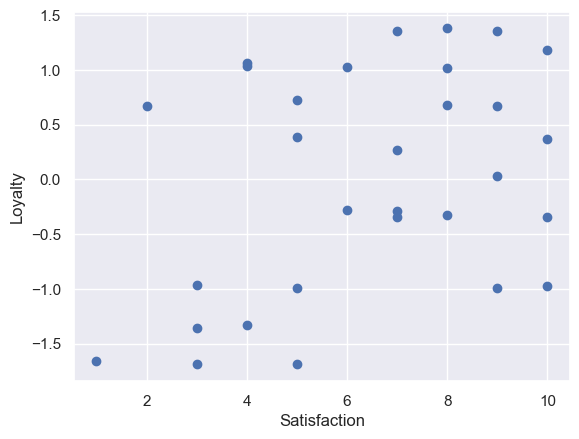

In [ ]:
plt.scatter(data['Satisfaction'], data['Loyalty'])
plt.xlabel('Satisfaction')
plt.ylabel('Loyalty')
plt.show()

## **Select the Features**

In [ ]:
x = data.copy()

In [ ]:
kmeans = KMeans(2)
kmeans.fit(x)
kmeans.get_params()

{'algorithm': 'auto',
 'copy_x': True,
 'init': 'k-means++',
 'max_iter': 300,
 'n_clusters': 2,
 'n_init': 10,
 'random_state': None,
 'tol': 0.0001,
 'verbose': 0}

## **Clustering the Results**

In [ ]:
clusters = x.copy()
clusters['clusters_pred'] = kmeans.fit_predict(x)

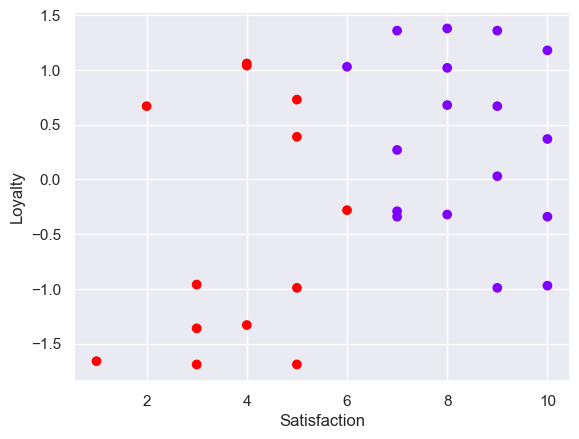

In [ ]:
plt.scatter(clusters['Satisfaction'], clusters['Loyalty'], c=clusters['clusters_pred'], cmap='rainbow')
plt.xlabel('Satisfaction')
plt.ylabel('Loyalty')
plt.show()

As you can see, there looks like a cutoff line on x=6. This solution may make sense to some, but most probably the algorithm only considered 'Satisfaction' as a feature. Why? Because we didn't standardize the variable. The satisfaction values are much higher than those of loyalty, and kmeans more or less disregard loyalty as a feature. Whenever we cluster on a basis of a single feature, the results will look like above.

## **Standardize the Variable**

In [ ]:
from sklearn import preprocessing
x_scaled = preprocessing.scale(x)


Text(0, 0.5, 'WCSS')

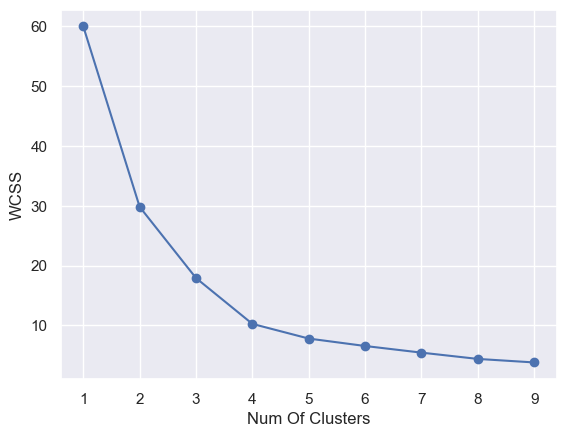

In [ ]:
wcss = []
for i in range(1, 10):
    kmeans = KMeans(i)
    kmeans.fit(x_scaled)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 10), wcss, '-o')
plt.xlabel('Num Of Clusters')
plt.ylabel('WCSS')

## **Explore clustering solutions and select the number of clusters**

In [ ]:
kmeans_new = KMeans(4)
kmeans_new.fit(x_scaled)
clusters_new = x.copy()
clusters_new['clusters_pred'] = kmeans_new.fit_predict(x_scaled)

In [ ]:
clusters_new

,Satisfaction,Loyalty,clusters_pred
0,4,-1.33,1
1,6,-0.28,0
2,5,-0.99,1
3,7,-0.29,0
4,4,1.06,2
5,1,-1.66,1
6,10,-0.97,0
7,8,-0.32,0
8,8,1.02,3
9,8,0.68,3


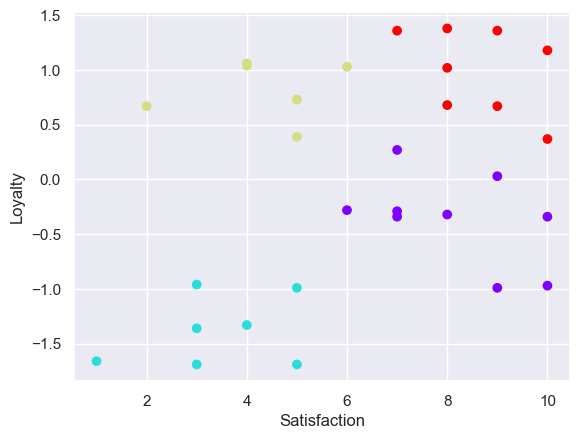

In [ ]:
plt.scatter(clusters_new['Satisfaction'], clusters_new['Loyalty'], c=clusters_new['clusters_pred'], cmap= 'rainbow')
plt.xlabel('Satisfaction')
plt.ylabel('Loyalty')
plt.show()